# Using TA-lib to identify entry and exit location
In this notebook, we will utilize the candlestick pattern recognition feature of the [TA-lib technical analysis library](https://ta-lib.org/) to find positions where we can LONG or SHORT the underlying ticker. 

This work is made possible by methods published in an [article on Medium](https://medium.com/analytics-vidhya/recognizing-over-50-candlestick-patterns-with-python-4f02a1822cb5), numerous threads on Stack Overflow for technical support, and countless consultations with ChatGPT.

## Data processing

### Getting data ready

In [26]:
import requests
import pandas as pd

# link for Bitcoin Data
link = "https://min-api.cryptocompare.com/data/histoday?fsym=BTC&tsym=USD&limit=365&aggregate=1"

# API request historical
historical_get = requests.get(link)

# access the content of historical api request
historical_json = historical_get.json()

# extract json data as dictionary
historical_dict = historical_json['Data']

# extract Final historical df
df = pd.DataFrame(historical_dict,
                             columns=['close', 'high', 'low', 'open', 'time', 'volumefrom', 'volumeto'],
                             dtype='float64')

# time column is converted to "YYYY-mm-dd hh:mm:ss" ("%Y-%m-%d %H:%M:%S")
posix_time = pd.to_datetime(df['time'], unit='s')

# append posix_time
df.insert(0, "date", posix_time)

# drop unix time stamp
df.drop("time", axis = 1, inplace = True)

### Rank candlestick patterns based on performance publish on www.patternsite.com

Note - 1:
Only some patterns have bull and bear versions. 
However, to make the process unified and for codability purposes 
all patterns are labeled with "_Bull" and "_Bear" tags.
Both versions of the single patterns are given same performance rank, 
since they will always return only 1 version.  

Note - 2: 
Following TA-Lib patterns are excluded from the analysis since the corresponding ranking not found:
CounterAttack, Longline, Shortline, Stalledpattern, Kickingbylength

In [27]:
candle_rankings = {
        "CDL3LINESTRIKE_Bull": 1,
        "CDL3LINESTRIKE_Bear": 2,
        "CDL3BLACKCROWS_Bull": 3,
        "CDL3BLACKCROWS_Bear": 3,
        "CDLEVENINGSTAR_Bull": 4,
        "CDLEVENINGSTAR_Bear": 4,
        "CDLTASUKIGAP_Bull": 5,
        "CDLTASUKIGAP_Bear": 5,
        "CDLINVERTEDHAMMER_Bull": 6,
        "CDLINVERTEDHAMMER_Bear": 6,
        "CDLMATCHINGLOW_Bull": 7,
        "CDLMATCHINGLOW_Bear": 7,
        "CDLABANDONEDBABY_Bull": 8,
        "CDLABANDONEDBABY_Bear": 8,
        "CDLBREAKAWAY_Bull": 10,
        "CDLBREAKAWAY_Bear": 10,
        "CDLMORNINGSTAR_Bull": 12,
        "CDLMORNINGSTAR_Bear": 12,
        "CDLPIERCING_Bull": 13,
        "CDLPIERCING_Bear": 13,
        "CDLSTICKSANDWICH_Bull": 14,
        "CDLSTICKSANDWICH_Bear": 14,
        "CDLTHRUSTING_Bull": 15,
        "CDLTHRUSTING_Bear": 15,
        "CDLINNECK_Bull": 17,
        "CDLINNECK_Bear": 17,
        "CDL3INSIDE_Bull": 20,
        "CDL3INSIDE_Bear": 56,
        "CDLHOMINGPIGEON_Bull": 21,
        "CDLHOMINGPIGEON_Bear": 21,
        "CDLDARKCLOUDCOVER_Bull": 22,
        "CDLDARKCLOUDCOVER_Bear": 22,
        "CDLIDENTICAL3CROWS_Bull": 24,
        "CDLIDENTICAL3CROWS_Bear": 24,
        "CDLMORNINGDOJISTAR_Bull": 25,
        "CDLMORNINGDOJISTAR_Bear": 25,
        "CDLXSIDEGAP3METHODS_Bull": 27,
        "CDLXSIDEGAP3METHODS_Bear": 26,
        "CDLTRISTAR_Bull": 28,
        "CDLTRISTAR_Bear": 76,
        "CDLGAPSIDESIDEWHITE_Bull": 46,
        "CDLGAPSIDESIDEWHITE_Bear": 29,
        "CDLEVENINGDOJISTAR_Bull": 30,
        "CDLEVENINGDOJISTAR_Bear": 30,
        "CDL3WHITESOLDIERS_Bull": 32,
        "CDL3WHITESOLDIERS_Bear": 32,
        "CDLONNECK_Bull": 33,
        "CDLONNECK_Bear": 33,
        "CDL3OUTSIDE_Bull": 34,
        "CDL3OUTSIDE_Bear": 39,
        "CDLRICKSHAWMAN_Bull": 35,
        "CDLRICKSHAWMAN_Bear": 35,
        "CDLSEPARATINGLINES_Bull": 36,
        "CDLSEPARATINGLINES_Bear": 40,
        "CDLLONGLEGGEDDOJI_Bull": 37,
        "CDLLONGLEGGEDDOJI_Bear": 37,
        "CDLHARAMI_Bull": 38,
        "CDLHARAMI_Bear": 72,
        "CDLLADDERBOTTOM_Bull": 41,
        "CDLLADDERBOTTOM_Bear": 41,
        "CDLCLOSINGMARUBOZU_Bull": 70,
        "CDLCLOSINGMARUBOZU_Bear": 43,
        "CDLTAKURI_Bull": 47,
        "CDLTAKURI_Bear": 47,
        "CDLDOJISTAR_Bull": 49,
        "CDLDOJISTAR_Bear": 51,
        "CDLHARAMICROSS_Bull": 50,
        "CDLHARAMICROSS_Bear": 80,
        "CDLADVANCEBLOCK_Bull": 54,
        "CDLADVANCEBLOCK_Bear": 54,
        "CDLSHOOTINGSTAR_Bull": 55,
        "CDLSHOOTINGSTAR_Bear": 55,
        "CDLMARUBOZU_Bull": 71,
        "CDLMARUBOZU_Bear": 57,
        "CDLUNIQUE3RIVER_Bull": 60,
        "CDLUNIQUE3RIVER_Bear": 60,
        "CDL2CROWS_Bull": 61,
        "CDL2CROWS_Bear": 61,
        "CDLBELTHOLD_Bull": 62,
        "CDLBELTHOLD_Bear": 63,
        "CDLHAMMER_Bull": 65,
        "CDLHAMMER_Bear": 65,
        "CDLHIGHWAVE_Bull": 67,
        "CDLHIGHWAVE_Bear": 67,
        "CDLSPINNINGTOP_Bull": 69,
        "CDLSPINNINGTOP_Bear": 73,
        "CDLUPSIDEGAP2CROWS_Bull": 74,
        "CDLUPSIDEGAP2CROWS_Bear": 74,
        "CDLGRAVESTONEDOJI_Bull": 77,
        "CDLGRAVESTONEDOJI_Bear": 77,
        "CDLHIKKAKEMOD_Bull": 82,
        "CDLHIKKAKEMOD_Bear": 81,
        "CDLHIKKAKE_Bull": 85,
        "CDLHIKKAKE_Bear": 83,
        "CDLENGULFING_Bull": 84,
        "CDLENGULFING_Bear": 91,
        "CDLMATHOLD_Bull": 86,
        "CDLMATHOLD_Bear": 86,
        "CDLHANGINGMAN_Bull": 87,
        "CDLHANGINGMAN_Bear": 87,
        "CDLRISEFALL3METHODS_Bull": 94,
        "CDLRISEFALL3METHODS_Bear": 89,
        "CDLKICKING_Bull": 96,
        "CDLKICKING_Bear": 102,
        "CDLDRAGONFLYDOJI_Bull": 98,
        "CDLDRAGONFLYDOJI_Bear": 98,
        "CDLCONCEALBABYSWALL_Bull": 101,
        "CDLCONCEALBABYSWALL_Bear": 101,
        "CDL3STARSINSOUTH_Bull": 103,
        "CDL3STARSINSOUTH_Bear": 103,
        "CDLDOJI_Bull": 104,
        "CDLDOJI_Bear": 104
    }

### Install TA-lib
This following method is needed to install in Google Colab environment.

In [ ]:
!curl -L http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz -O && tar xzvf ta-lib-0.4.0-src.tar.gz 
!cd ta-lib && ./configure --prefix=/usr && make && make install && cd - && pip install ta-lib

### Candlestick recognition
This is where the magic happens. We will take in the dataframe and break it into open, high, low, and close, and pass it through TA-lib to identify the presence of candlesticks. Multiple patterns might be recognized, so we will use the performance rank earlier to only choose the "more important" ones.

In [29]:
import numpy as np
import talib
from itertools import compress

def recognize_candlestick(df):
    """
    Recognizes candlestick patterns and appends 2 additional columns to df;
    1st - Best Performance candlestick pattern matched by www.thepatternsite.com
    2nd - # of matched patterns
    """

    op = df['open'].astype(float)
    hi = df['high'].astype(float)
    lo = df['low'].astype(float)
    cl = df['close'].astype(float)

    candle_names = talib.get_function_groups()['Pattern Recognition']

    # patterns not found in the patternsite.com
    exclude_items = ('CDLCOUNTERATTACK',
                     'CDLLONGLINE',
                     'CDLSHORTLINE',
                     'CDLSTALLEDPATTERN',
                     'CDLKICKINGBYLENGTH')

    candle_names = [candle for candle in candle_names if candle not in exclude_items]

    # create columns for each candle
    for candle in candle_names:
        # below is same as;
        # df["CDL3LINESTRIKE"] = talib.CDL3LINESTRIKE(op, hi, lo, cl)
        df[candle] = getattr(talib, candle)(op, hi, lo, cl)

    df['candlestick_pattern'] = np.nan
    df['candlestick_match_count'] = np.nan
    df['entry_signal'] = np.nan
    df['exit_signal'] = np.nan

    for index, row in df.iterrows():

        # no pattern found
        if len(row[candle_names]) - sum(row[candle_names] == 0) == 0:
            df.loc[index,'candlestick_pattern'] = "NO_PATTERN"
            df.loc[index, 'candlestick_match_count'] = 0
        # single pattern found
        elif len(row[candle_names]) - sum(row[candle_names] == 0) == 1:
            # bull pattern 100 or 200
            if any(row[candle_names].values > 0):
                pattern = list(compress(row[candle_names].keys(), row[candle_names].values != 0))[0] + '_Bull'
                df.loc[index, 'candlestick_pattern'] = pattern
                df.loc[index, 'candlestick_match_count'] = 1
                df.loc[index, 'entry_signal'] = True
            # bear pattern -100 or -200
            else:
                pattern = list(compress(row[candle_names].keys(), row[candle_names].values != 0))[0] + '_Bear'
                df.loc[index, 'candlestick_pattern'] = pattern
                df.loc[index, 'candlestick_match_count'] = 1
                df.loc[index, 'exit_signal'] = True
        # multiple patterns matched -- select best performance
        else:
            # filter out pattern names from bool list of values
            patterns = list(compress(row[candle_names].keys(), row[candle_names].values != 0))
            container = []
            for pattern in patterns:
                if row[pattern] > 0:
                    container.append(pattern + '_Bull')
                    df.loc[index, 'entry_signal'] = True
                else:
                    container.append(pattern + '_Bear')
                    df.loc[index, 'exit_signal'] = True
            rank_list = [candle_rankings[p] for p in container]
            if len(rank_list) == len(container):
                rank_index_best = rank_list.index(min(rank_list))
                df.loc[index, 'candlestick_pattern'] = container[rank_index_best]
                df.loc[index, 'candlestick_match_count'] = len(container)

    return df

In [30]:
new_df = recognize_candlestick(df)

### Checking the number of entry and exit signal detected

In [31]:
entry_signal_rows = new_df[new_df['entry_signal'] == True]
exit_signal_rows = new_df[new_df['exit_signal'] == True]

print(f'The number of entry signals: {len(entry_signal_rows)}')
print(f'The number of exit signals: {len(exit_signal_rows)}')

The number of entry signals: 127
The number of exit signals: 107


### Do math

Basically, this is the math part where you buy 1 BTC when the entry signal is true or sell 1 BTC when the exit signal is true. Since this notebook is only to backtest whether the system works, we will not take into account complex stuff like risk control and portfolio optimization yet.

In [ ]:
# create position size column
new_df['long'] = np.where(new_df['entry_signal'] == 1, 1, 0)
new_df['short'] = np.where(new_df['exit_signal'] == 1, 1, 0)
new_df['daily_position_size'] = new_df['long'] - new_df['short']

# calculate position change over time
new_df['cum_position_size'] = new_df['daily_position_size'].cumsum()

new_df[(new_df['exit_signal']==True) | (new_df['entry_signal']==True)][['date','entry_signal','exit_signal','cum_position_size']][:]

## Visualization
Starting plotting figures to see if our system makes any sense.

In [33]:
import matplotlib.pyplot as plt

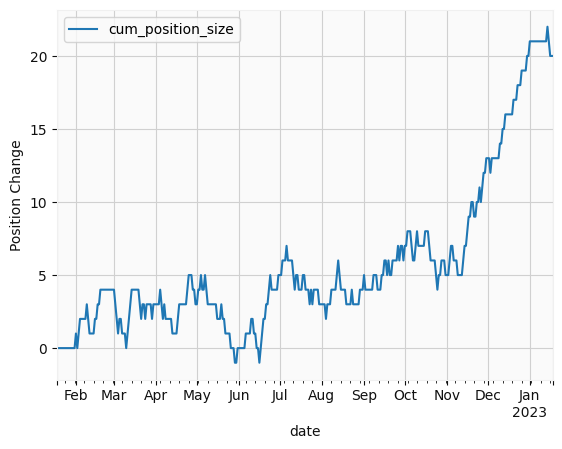

In [34]:
# plot the position change over time
new_df.plot(x='date', y='cum_position_size', kind='line')
plt.xlabel('date')
plt.ylabel('Position Change')
plt.show()

This is the amount of LONG BTC we have over time. It seems like the part before Nov 2022 is buying and selling, however, after that is just constant buying btc. Sounds like we will be running low on cash... let's check that in the following parts. 

In [35]:
# shift open column by 1 to get the purchase price, since we will be buying only after the signal is detected
new_df['market_price'] = new_df['open'].shift(-1)

In [36]:
# create entry price column
new_df['entry_price'] = np.where(new_df['entry_signal'] == 1, new_df['market_price'], np.nan)

# forward fill entry price for open position
new_df['entry_price'].ffill(inplace=True)

# create exit price column
new_df['exit_price'] = np.where(new_df['exit_signal'] == 1, new_df['market_price'], np.nan)

# forward fill exit price for closed position
new_df['exit_price'].ffill(inplace=True)

Assume that we start with $100k.

In [37]:
initial_capital = 100000

new_df['unrealized_pnl'] = new_df['cum_position_size'] * (new_df['close'] - new_df['entry_price'])

new_df['realized_pnl'] = np.where(new_df['exit_signal'] == 1, 
                                  new_df['exit_price'] - new_df['entry_price'], 
                                  np.nan)

new_df['cash_balance'] = new_df['realized_pnl'].cumsum() + initial_capital

new_df['portfolio_value'] = (new_df['cum_position_size'] * new_df['close']).cumsum() + df['cash_balance']

In [38]:
new_df['cash_balance'].ffill(inplace=True)
new_df['portfolio_value'].ffill(inplace=True)

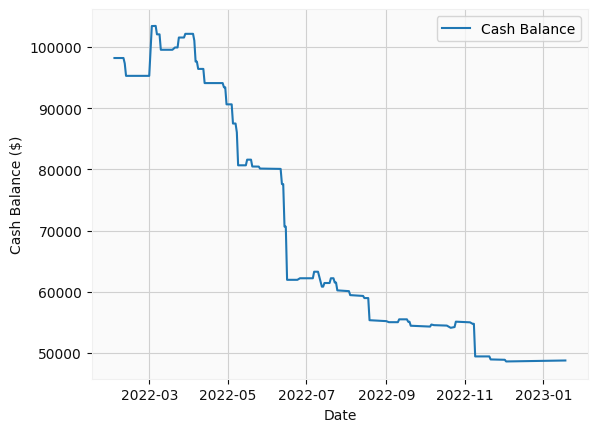

In [39]:
# plot cash balance over time
plt.plot(new_df['date'], new_df['cash_balance'], label='Cash Balance')

plt.xlabel('Date')
plt.ylabel('Cash Balance ($)')
plt.legend()
plt.show()

Just as expected: cash are going lower and lower, since we are constantly buying btc and not selling towards the end. How about the overall profit?

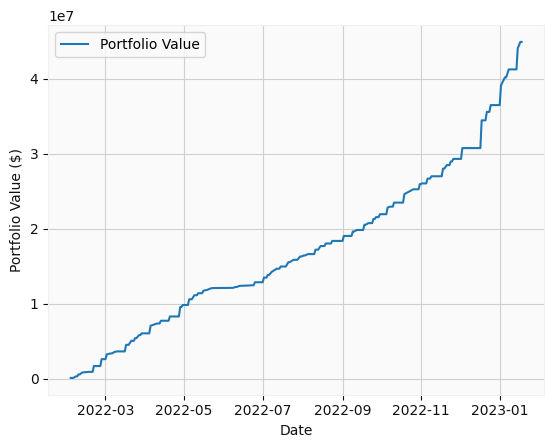

In [40]:
# plot portfolio value over time
plt.plot(new_df['date'], new_df['portfolio_value'], label='Portfolio Value')

plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.show()

Our portfolio value grew! However these are all paper gains (unrealized P/L), since we haven't close our LONG position yet... hopefully it won't crash if this is a live system :)

### Plotting LONG and SHORT location 

This part is to add arrows when the patterns are recognized and the trader should trade accordingly.

In [ ]:
!pip install mplfinance

In [42]:
import matplotlib.pyplot as plt
import mplfinance as mpf
import matplotlib.dates as mdates
import numpy as np

In [43]:
# format data for candlestick plot
# Take a smaller data set so it's easier to see the scatter points
data_ohlc = new_df[['date', 'open', 'high', 'low', 'close','entry_signal','exit_signal']].tail(50)
data_ohlc = data_ohlc.set_index('date')
data_ohlc = data_ohlc.astype(float)

In [44]:
data_ohlc.fillna(value=0, inplace=True)
buy_signal = data_ohlc['entry_signal'].astype(int)
buy_signal = buy_signal.replace(0, np.nan)
buy_signal_loc = buy_signal*data_ohlc['low']*.99

sell_signal = data_ohlc['exit_signal'].astype(int)
sell_signal = sell_signal.replace(0, np.nan)
sell_signal_loc = sell_signal*data_ohlc['high']*1.1

apd = [mpf.make_addplot(buy_signal_loc, scatter=True, markersize=100, marker=r'$\Uparrow$', color='green'),
       mpf.make_addplot(sell_signal_loc, scatter=True, markersize=100, marker=r'$\Downarrow$', color='red'),]   

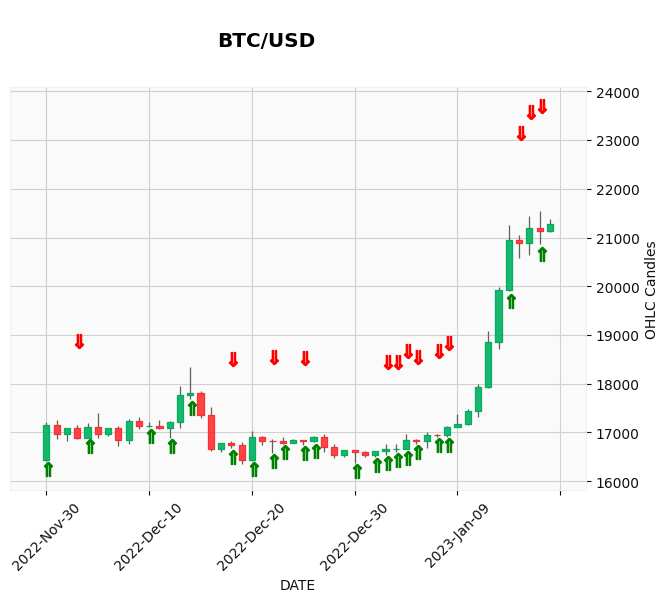

In [45]:
mpf.plot(data_ohlc, 
         type='candle', 
         style='yahoo',
         title='\nBTC/USD',
         ylabel='OHLC Candles',
         xlabel='DATE',
         addplot=apd
         )

## Discussion / Conclusion

Preliminary backtesting data using TA-lib seems promising (portfolio growing steadily!). However, a closer inspection will find that there might be too many signals generated: at the extreme, we will deplete all the cash and go all in LONG BTC. As such,


1.   More complex risk control and portfolio optimization should be added to control the exposure (think Kelly criterion).
2.   We should establish a better metric to quantify how good the enter or exit signal is. For example, does our trade profit x%?
3. Encoding the candlestick pattern as a Gramian Angular Function as presented in the papers by [PecuLab FinancialVision series](https://github.com/pecu/FinancialVision). This way, we can capture the entry and exit signal by the pattern itself, rather than hard-coded conditions as outlined in TA-lib."